A Jupyter notebook for analyzing the pLDDT statistics of the AlphaFold2 and ColabFold autoinhibitory and Two-Domain proteins.

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scienceplots
from scipy.stats import mannwhitneyu
from statannotations.Annotator import Annotator

In [74]:
'''
Load dataframes
'''

afAuto = pd.read_csv('./project_pipeline/data/af_autoinhibited_pLDDT.tsv', sep='\t').astype('object')
afMulti = pd.read_csv('./project_pipeline/data/af_multi_domain_pLDDT.tsv', sep='\t').astype('object')
cfAuto = pd.read_csv('./project_pipeline/data/cf_autoinhibited_pLDDT.tsv', sep='\t').astype('object')
cfMulti = pd.read_csv('./project_pipeline/data/cf_multi_domain_pLDDT.tsv', sep='\t').astype('object')

# Set style
plt.style.use('science')

We pivot our dataframes in order to graph them

In [75]:
# Functions to rename columns

def rename_auto_columns(df):
    df = df.rename(columns={'complex_mean_plddt': 'Complex', 'r1_mean_plddt': 'Region 1', 'r2_mean_plddt': 'Region 2'})

    return df

def rename_multi_columns(df):
    df = df.rename(columns={'complex_mean_plddt': 'Complex', 'r1_mean_plddt': 'Region 1', 'r2_mean_plddt': 'Region 2'})

    return df

# Quick functions to melt dataframes
def pivot_af_df(df):
    df = df.melt(id_vars=['uniprot', 'region_1', 'region_2', 'filename'], var_name='section', value_name='mean_plddt')
    df['mean_plddt'] = df['mean_plddt'].astype(float)

    return df

def pivot_cf_df(df):
    df = df.melt(id_vars=['uniprot', 'cluster', 'region_1', 'region_2', 'filename'], var_name='section', value_name='mean_plddt')
    df['mean_plddt'] = df['mean_plddt'].astype(float)

    return df

# Add signifier column
def add_auto_type(df):
    df['type'] = 'Autoinhibitory'

    return df

def add_multi_type(df):
    df['type'] = 'Two-Domain'

    return df

In [76]:
# Rename columns
af_auto = rename_auto_columns(afAuto)
af_multi = rename_multi_columns(afMulti)
cf_auto = rename_auto_columns(cfAuto)
cf_multi = rename_multi_columns(cfMulti)

# Pivot dataframes
afAuto_p = pivot_af_df(af_auto)
afMulti_p = pivot_af_df(af_multi)
cfAuto_p = pivot_cf_df(cf_auto)
cfMulti_p = pivot_cf_df(cf_multi)

# Add type column
afAuto_p = add_auto_type(afAuto_p)
afMulti_p = add_multi_type(afMulti_p)
cfAuto_p = add_auto_type(cfAuto_p)
cfMulti_p = add_multi_type(cfMulti_p)

# Concatenate dataframes
af = pd.concat([afAuto_p, afMulti_p])
cf = pd.concat([cfAuto_p, cfMulti_p])

Now we chart them as boxplots

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Region 1_Autoinhibitory vs. Region 1_Two-Domain: Mann-Whitney-Wilcoxon test two-sided, P_val:2.275e-10 U_stat=1.330e+03
Complex_Autoinhibitory vs. Complex_Two-Domain: Mann-Whitney-Wilcoxon test two-sided, P_val:9.538e-17 U_stat=7.120e+02
Region 2_Autoinhibitory vs. Region 2_Two-Domain: Mann-Whitney-Wilcoxon test two-sided, P_val:1.008e-07 U_stat=1.649e+03


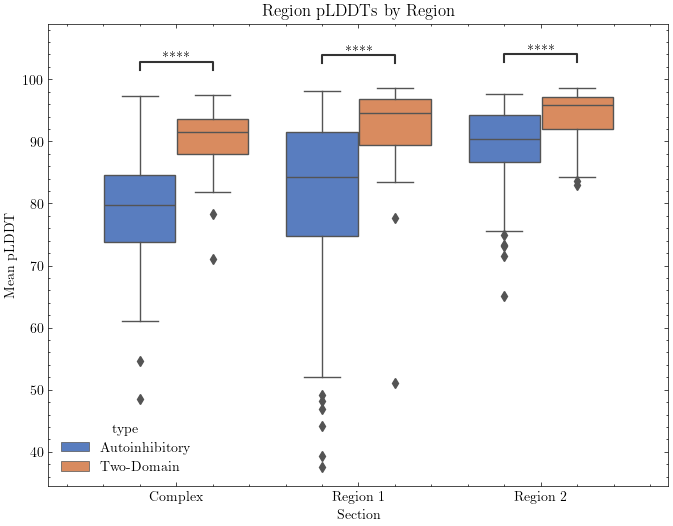

In [77]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=af, x='section', y='mean_plddt', ax = ax, hue='type', palette='muted')
ax.set_ylabel('Mean pLDDT')
ax.set_xlabel('Section')
ax.set_title('Region pLDDTs by Region')

# Annotate statistical significance
pairs = [[('Complex', 'Autoinhibitory'), ('Complex', 'Two-Domain')],
         [('Region 1', 'Autoinhibitory'), ('Region 1', 'Two-Domain')],
         [('Region 2', 'Autoinhibitory'), ('Region 2', 'Two-Domain')]]
subcat_order = ['Complex', 'Region 1', 'Region 2']
annotator = Annotator(ax, pairs, data=af, x='section', y='mean_plddt', order=subcat_order, hue='type')
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

# Save the figure
plt.savefig('./project_pipeline/data/figures/af_auto_multi_plddt1.png')

Let's do a boxplot for the reverse

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Two-Domain_Region 1 vs. Two-Domain_Region 2: Mann-Whitney-Wilcoxon test two-sided, P_val:2.418e-01 U_stat=1.267e+03
Autoinhibitory_Complex vs. Autoinhibitory_Region 1: Mann-Whitney-Wilcoxon test two-sided, P_val:2.182e-03 U_stat=5.854e+03
Autoinhibitory_Region 1 vs. Autoinhibitory_Region 2: Mann-Whitney-Wilcoxon test two-sided, P_val:9.617e-07 U_stat=4.830e+03
Two-Domain_Complex vs. Two-Domain_Region 1: Mann-Whitney-Wilcoxon test two-sided, P_val:2.103e-03 U_stat=9.570e+02
Two-Domain_Complex vs. Two-Domain_Region 2: Mann-Whitney-Wilcoxon test two-sided, P_val:5.524e-06 U_stat=7.180e+02
Autoinhibitory_Complex vs. Autoinhibitory_Region 2: Mann-Whitney-Wilcoxon test two-sided, P_val:3.129e-20 U_stat=2.422e+03


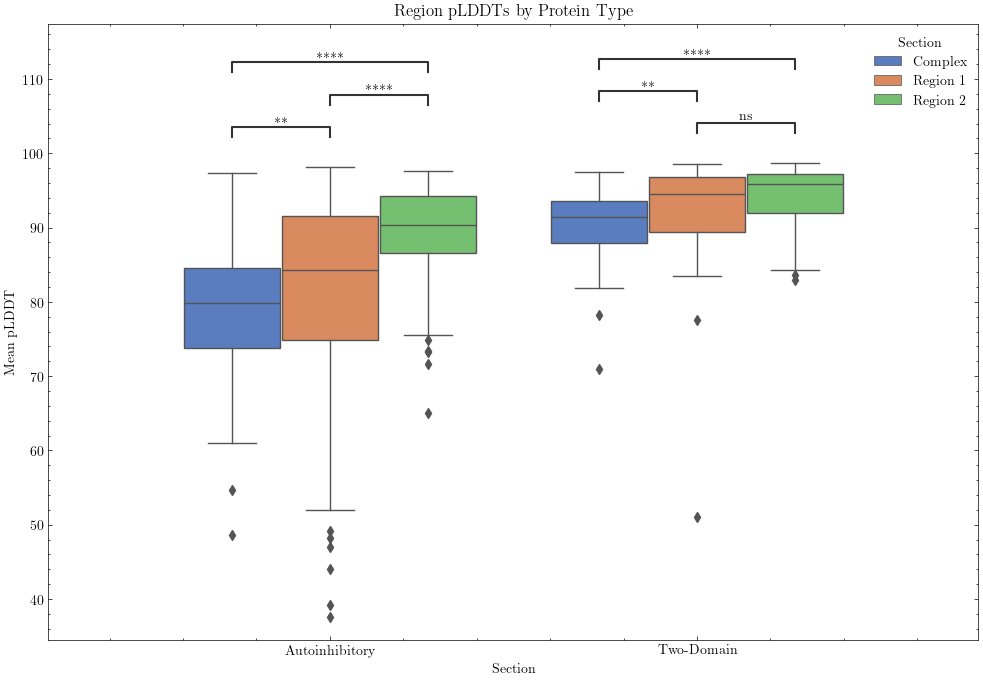

In [78]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=af, x='type', y='mean_plddt', ax = ax, hue='section', palette='muted')
ax.set_ylabel('Mean pLDDT')
ax.set_xlabel('Section')
ax.set_title('Region pLDDTs by Protein Type')
ax.legend(title='Section')

# Annotate statistical significance
pairs = [[('Autoinhibitory', 'Complex'), ('Autoinhibitory', 'Region 1')],
         [('Autoinhibitory', 'Complex'), ('Autoinhibitory', 'Region 2')],
         [('Autoinhibitory', 'Region 1'), ('Autoinhibitory', 'Region 2')],
         [('Two-Domain', 'Complex'), ('Two-Domain', 'Region 1')],
         [('Two-Domain', 'Complex'), ('Two-Domain', 'Region 2')],
         [('Two-Domain', 'Region 1'), ('Two-Domain', 'Region 2')]]
subcat_order = ['Autoinhibitory', 'Two-Domain']
annotator = Annotator(ax, pairs, data=af, x='type', y='mean_plddt', order=subcat_order, hue='section')
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

# Save the figure
plt.savefig('./project_pipeline/data/figures/af_auto_multi_plddt2.png')

There are 123 proteins in the autoinhibited AlphaFold2 and 54 in the Two-Domain Alphafold2.

Now we'll look at only those proteins with two states

In [79]:
# First subset dataframe to only include proteins with two states

# Get list of two-state proteins
two = pd.read_csv('./project_pipeline/data/two_states.tsv', sep='\t').astype('object')
twolist = two['uniprot'].unique().tolist()

# Subset dataframe
af_two = afAuto[afAuto['uniprot'].isin(twolist)].reset_index(drop=True)

# Now rename and melt the dataframes
rename = rename_auto_columns(af_two)
af_twos = pivot_af_df(rename)
af_twos.head()

,uniprot,region_1,region_2,filename,section,mean_plddt
0,O08967,"251-265,383-395",77-206,F-O08967-F1-model_v3.cif,Complex,85.817
1,O60741,401-479,480-604,F-O60741-F1-model_v3.cif,Complex,70.564
2,P07038,892-917,562-625,F-P07038-F1-model_v3.cif,Complex,77.453
3,P12931,"249-269,151-248","84-145,524-536",F-P12931-F1-model_v3.cif,Complex,84.513
4,P21333,2142-2235,2236-2325,F-P21333-F1-model_v3.cif,Complex,77.384


Now we'll plot those proteins with two states. We'll compare against our colabfold files.

In [80]:
# Add sources for the two dataframes
af_twos['source'] = 'DeepMind'
cfAuto_p['source'] = 'ColabFold'

two_states = pd.concat([af_twos, cfAuto_p])
two_states.head()

,uniprot,region_1,region_2,filename,section,mean_plddt,source,cluster,type
0,O08967,"251-265,383-395",77-206,F-O08967-F1-model_v3.cif,Complex,85.817,DeepMind,NaN,NaN
1,O60741,401-479,480-604,F-O60741-F1-model_v3.cif,Complex,70.564,DeepMind,NaN,NaN
2,P07038,892-917,562-625,F-P07038-F1-model_v3.cif,Complex,77.453,DeepMind,NaN,NaN
3,P12931,"249-269,151-248","84-145,524-536",F-P12931-F1-model_v3.cif,Complex,84.513,DeepMind,NaN,NaN
4,P21333,2142-2235,2236-2325,F-P21333-F1-model_v3.cif,Complex,77.384,DeepMind,NaN,NaN


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Region 1_DeepMind vs. Region 1_ColabFold: Mann-Whitney-Wilcoxon test two-sided, P_val:2.060e-05 U_stat=2.380e+03
Complex_DeepMind vs. Complex_ColabFold: Mann-Whitney-Wilcoxon test two-sided, P_val:3.087e-04 U_stat=2.242e+03
Region 2_DeepMind vs. Region 2_ColabFold: Mann-Whitney-Wilcoxon test two-sided, P_val:2.050e-06 U_stat=2.484e+03


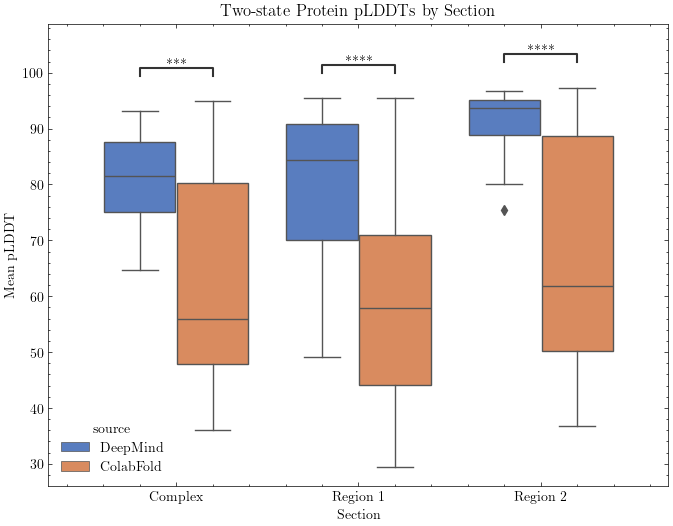

In [81]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=two_states, x='section', y='mean_plddt', ax=ax, hue='source', palette='muted')
ax.set_title('Two-state Protein pLDDTs by Section')
ax.set_xlabel('Section')
ax.set_ylabel('Mean pLDDT')

# Annotate statistical significance
pairs = [[('Complex', 'DeepMind'), ('Complex', 'ColabFold')],
         [('Region 1', 'DeepMind'), ('Region 1', 'ColabFold')],
         [('Region 2', 'DeepMind'), ('Region 2', 'ColabFold')]]

subcat_order = ['Complex', 'Region 1', 'Region 2']
annotator = Annotator(ax, pairs, data=two_states, x='section', y='mean_plddt', order=subcat_order, hue='source')
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

plt.savefig('./project_pipeline/data/figures/af_two_states_plddt1.png')

Now we do the reverse

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

ColabFold_Region 1 vs. ColabFold_Region 2: Mann-Whitney-Wilcoxon test two-sided, P_val:9.247e-04 U_stat=1.060e+04
DeepMind_Complex vs. DeepMind_Region 1: Mann-Whitney-Wilcoxon test two-sided, P_val:6.925e-01 U_stat=1.490e+02
DeepMind_Region 1 vs. DeepMind_Region 2: Mann-Whitney-Wilcoxon test two-sided, P_val:2.515e-03 U_stat=6.600e+01
ColabFold_Complex vs. ColabFold_Region 1: Mann-Whitney-Wilcoxon test two-sided, P_val:1.876e-01 U_stat=1.458e+04
ColabFold_Complex vs. ColabFold_Region 2: Mann-Whitney-Wilcoxon test two-sided, P_val:2.226e-02 U_stat=1.148e+04
DeepMind_Complex vs. DeepMind_Region 2: Mann-Whitney-Wilcoxon test two-sided, P_val:1.376e-04 U_stat=4.100e+01


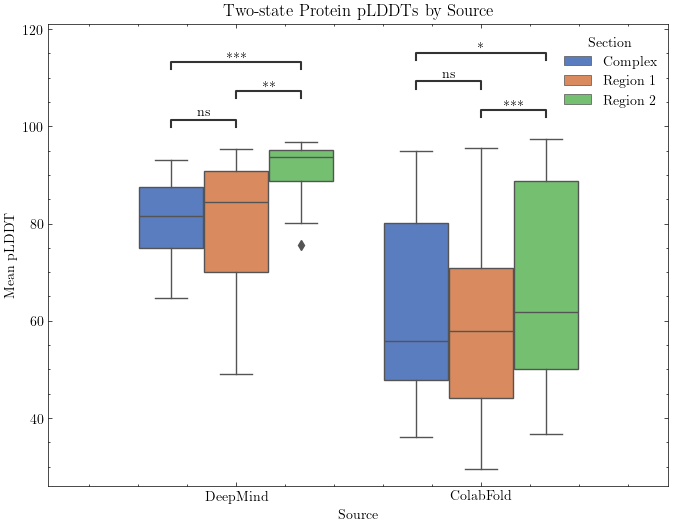

In [82]:
# Reverse section and source in the previous plot  
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=two_states, x='source', y='mean_plddt', ax=ax, hue='section', palette='muted')
ax.set_title('Two-state Protein pLDDTs by Source')
ax.set_xlabel('Source')
ax.set_ylabel('Mean pLDDT')
ax.legend(title='Section')

# Annotate statistical significance
pairs = [[('DeepMind', 'Complex'), ('DeepMind', 'Region 1')],
         [('DeepMind', 'Complex'), ('DeepMind', 'Region 2')],
         [('DeepMind', 'Region 1'), ('DeepMind', 'Region 2')],
         [('ColabFold', 'Complex'), ('ColabFold', 'Region 1')],
         [('ColabFold', 'Complex'), ('ColabFold', 'Region 2')],
         [('ColabFold', 'Region 1'), ('ColabFold', 'Region 2')]]

subcat_order = ['DeepMind', 'ColabFold']
annotator = Annotator(ax, pairs, data=two_states, x='source', y='mean_plddt', order=subcat_order, hue='section')
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

plt.savefig('./project_pipeline/data/figures/af_two_states_plddt2.png')